In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading 
file_name='german_credit_data_wrisk.csv'
df=pd.read_csv(f"../data/{file_name}")

In [3]:
print(df.head(5))

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [44]:
print(df['Risk'].value_counts())

Risk
good    700
bad     300
Name: count, dtype: int64


In [4]:
#change risk column into 1s and 0s
d={'good':0,'bad':1}
df['Risk']=df["Risk"].replace(d)
print(df.head(5))

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV     0  
1           5951        48             radio/TV     1  
2           2096        12            education     0  
3           7882        42  furniture/equipment     0  
4           4870        24                  car     1  


C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\721336598.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Risk']=df["Risk"].replace(d)


In [5]:
print(df['Risk'].value_counts())

Risk
0    700
1    300
Name: count, dtype: int64


### Supervised  EDA - Exploratory Data Analysis

In [6]:

#remove the first column the numbered people, it's just noise not helping predicting the risk
df.drop('Unnamed: 0', axis=1, inplace=True)

# general infos
df.info()

# number statistics (age, credit amount, duration)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


Risk
0    0.7
1    0.3
Name: proportion, dtype: float64


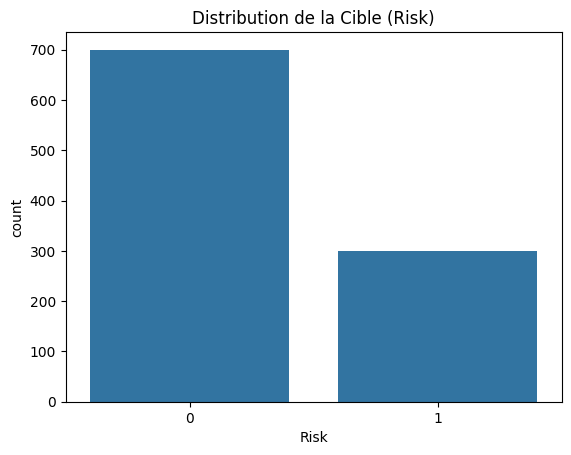

In [7]:
# understanding Risk
print(df['Risk'].value_counts(normalize=True))

sns.countplot(x='Risk', data=df)
plt.title('Distribution de la Cible (Risk)')
plt.show()

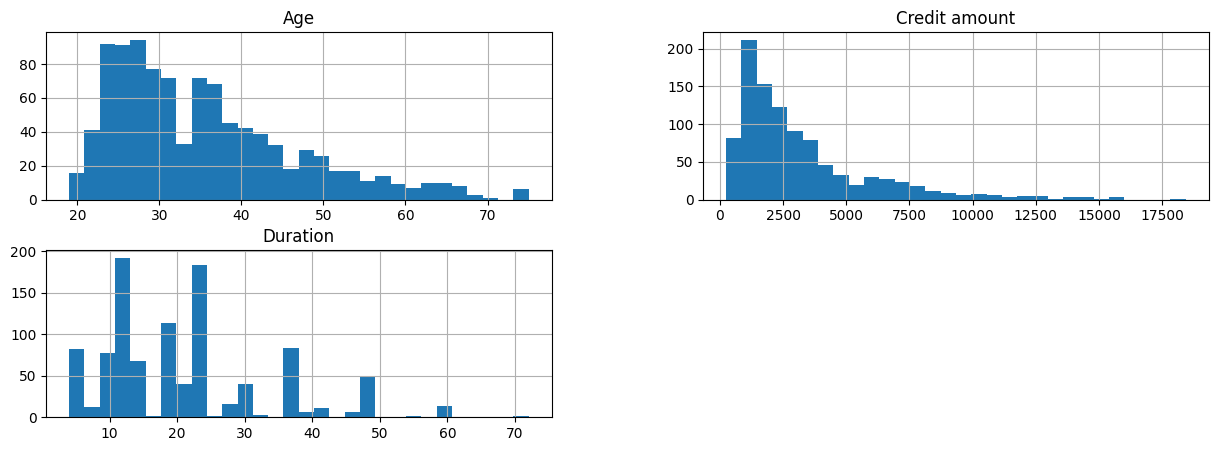

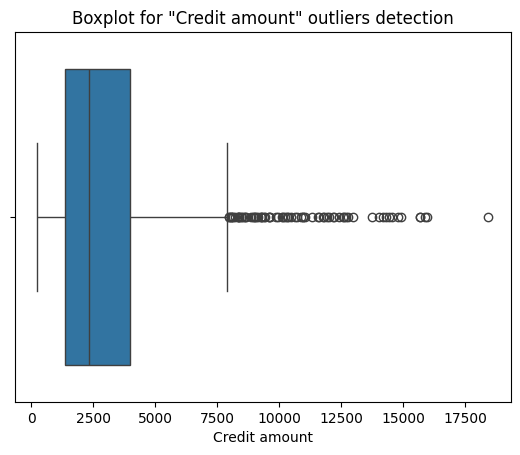

In [8]:
#Analysis: feature per feature
#plot for each numerical column
df_numeric = df[['Age', 'Credit amount', 'Duration']]
df_numeric.hist(bins=30, figsize=(15, 5))
plt.show()

# focusing on outliers in credit amount 
sns.boxplot(x='Credit amount', data=df)
plt.title('Boxplot for "Credit amount" outliers detection')
plt.show()

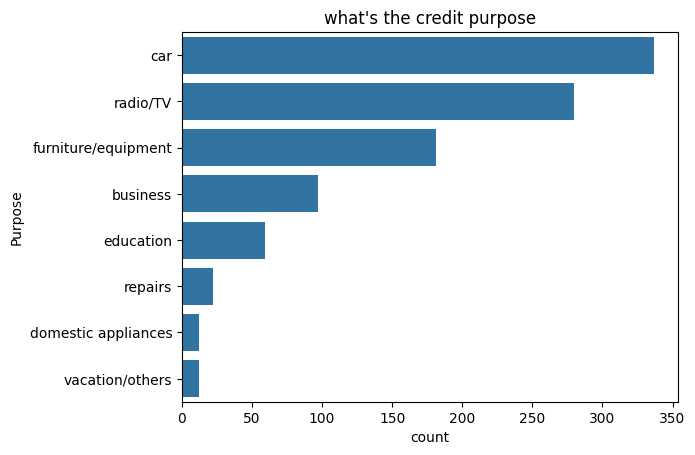

In [53]:
#non numerical features 
# studying the purpose of the credit
#plot of the recurring purposes ordered by their frequency
sns.countplot(y='Purpose', data=df, order = df['Purpose'].value_counts().index)
plt.title("what's the credit purpose")
plt.show()

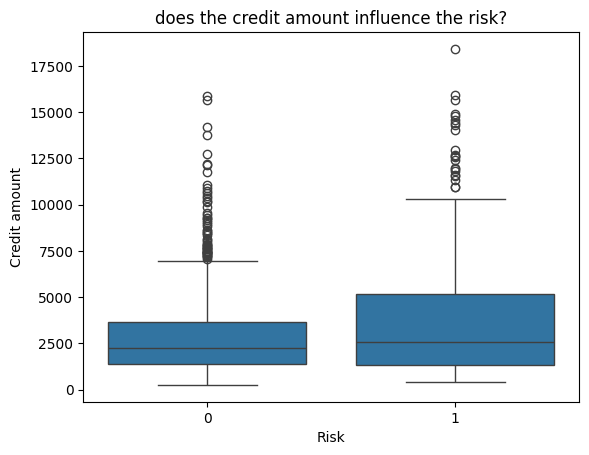

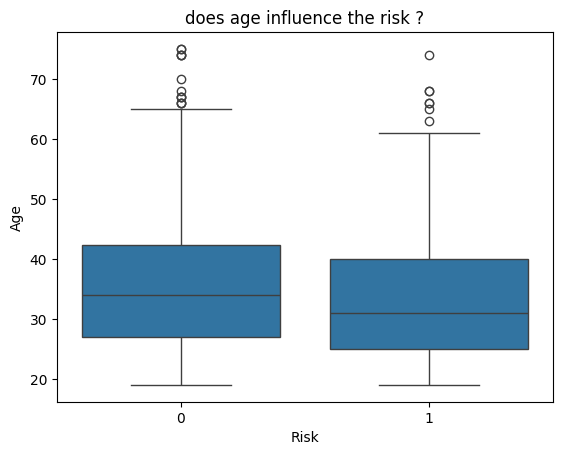

In [55]:
# bivarite analysis

# L'arme secrète de l'EDA pour la classification
sns.boxplot(x='Risk', y='Credit amount', data=df)
plt.title('does the credit amount influence the risk?')
plt.show()

sns.boxplot(x='Risk', y='Age', data=df)
plt.title('does age influence the risk ?')
plt.show()

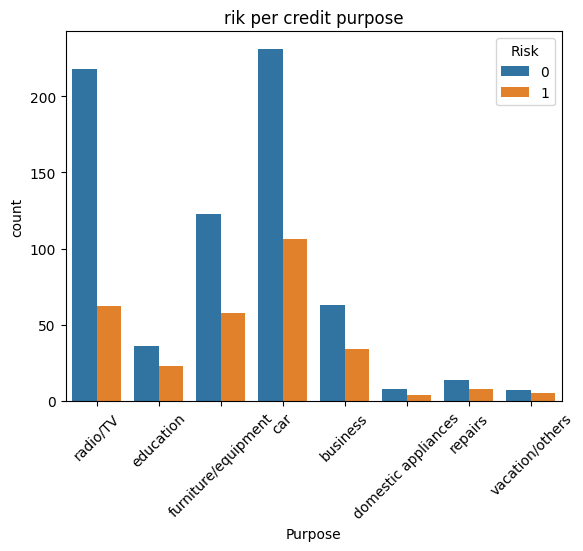

In [56]:
# studying the purpose of the credit in relation to the risk
sns.countplot(x='Purpose', hue='Risk', data=df)
plt.title('rik per credit purpose')
plt.xticks(rotation=45)
plt.show()

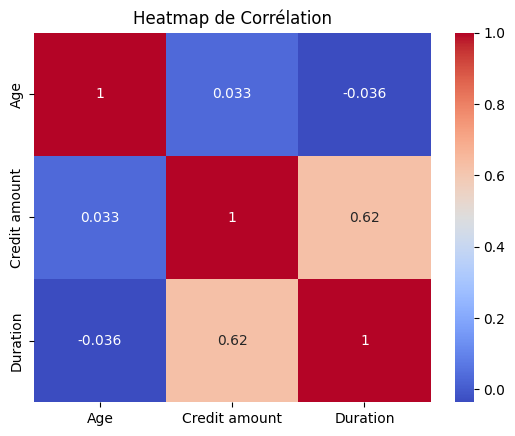

In [57]:
#heatmap visualisation (ony numerical columns)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Corrélation')
plt.show()

### Data preprocessing

In [9]:
# missing values
df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account']=df['Checking account'].fillna('Unknown')

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None


### Feature Engineering

In [11]:
# changing the type of data, conversion into numerical
d_sex={'male':0,'female':1}
df['Sex']=df['Sex'].replace(d_sex)
# verifying result
print(df.head())

   Age  Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    0    2     own         Unknown           little           1169   
1   22    1    2     own          little         moderate           5951   
2   49    0    1     own          little          Unknown           2096   
3   45    0    2    free          little           little           7882   
4   53    0    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV     0  
1        48             radio/TV     1  
2        12            education     0  
3        42  furniture/equipment     0  
4        24                  car     1  


C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\36858908.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace(d_sex)


In [12]:
# Create a list of all categorical columns
# We include 'Job' here because 0, 1, 2, 3 are categories, not quantities
categorical_cols = [
    'Job', 
    'Housing', 
    'Saving accounts', 
    'Checking account', 
    'Purpose'
]

# Use pd.get_dummies to one-hot encode all of them at once
# drop_first=True is a good practice to avoid multicollinearity (redundant info)
df_encoded = pd.get_dummies(
    df, 
    columns=categorical_cols, 
    drop_first=True
)

# Display the first 5 rows and the new columns
print(df_encoded.head())
print(df_encoded.info())

   Age  Sex  Credit amount  Duration  Risk  Job_1  Job_2  Job_3  Housing_own  \
0   67    0           1169         6     0  False   True  False         True   
1   22    1           5951        48     1  False   True  False         True   
2   49    0           2096        12     0   True  False  False         True   
3   45    0           7882        42     0  False   True  False        False   
4   53    0           4870        24     1  False   True  False        False   

   Housing_rent  ...  Checking account_little  Checking account_moderate  \
0         False  ...                     True                      False   
1         False  ...                    False                       True   
2         False  ...                    False                      False   
3         False  ...                     True                      False   
4         False  ...                     True                      False   

   Checking account_rich  Purpose_car  Purpose_domestic applia

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [14]:

# --- 1. Separate X and y BEFORE scaling ---
# y is our target
y = df_encoded['Risk'] 
# X is everything ELSE
X = df_encoded.drop('Risk', axis=1)

# --- 2. Split the data into Training and Test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Prepare the Scaler ---
# Create an instance of the scaler
scaler = StandardScaler()
# --- 4. Fit the standard scaler on the training data only ---
scaler.fit(X_train)

# --- 5. Transform (scale) both training and test data ---
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#  Checking the result
#  values will be centered around 0
print("Scaled training data (first 5 rows):")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Scaled training data (first 5 rows):
        Age       Sex  Credit amount  Duration     Job_1     Job_2     Job_3  \
0  2.406187 -0.682057       1.199912  3.297082 -0.480384  0.764303 -0.436436   
1 -0.224364 -0.682057      -0.359630 -0.008051 -0.480384  0.764303 -0.436436   
2  1.266282 -0.682057      -0.733547 -1.279256 -0.480384  0.764303 -0.436436   
3 -0.575104  1.466154       0.567050 -0.008051 -0.480384  0.764303 -0.436436   
4 -1.276585  1.466154      -0.854388 -0.770774 -0.480384  0.764303 -0.436436   

   Housing_own  Housing_rent  Saving accounts_little  ...  \
0     0.629413     -0.460566                0.829315  ...   
1    -1.588782      2.171241                0.829315  ...   
2    -1.588782      2.171241               -1.205814  ...   
3     0.629413     -0.460566               -1.205814  ...   
4     0.629413     -0.460566               -1.205814  ...   

   Checking account_little  Checking account_moderate  Checking account_rich  \
0                 1.654786         

### training our model using logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       141
           1       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200


--- Confusion Matrix ---
[[128  13]
 [ 35  24]]


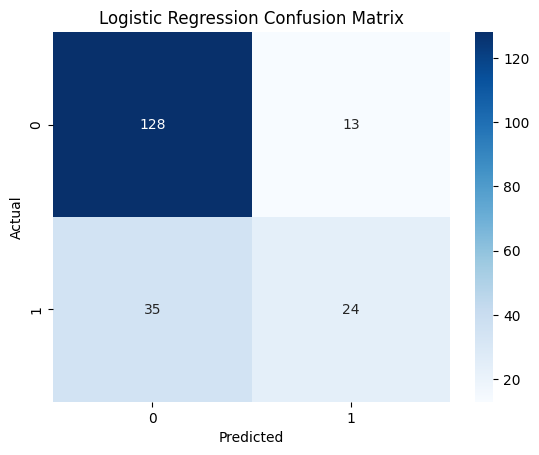

In [17]:
# --- 1. Create and Train the Model ---
# We use our scaled training data
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# --- 2. Make Predictions on the Test Set ---
# We use our scaled test data
y_pred = model.predict(X_test_scaled)

# --- 3. Evaluate the Model's Performance ---

# First, let's see the "report card"
print("--- Classification Report ---")
# This shows you the Precision, Recall, and F1-Score
print(classification_report(y_test, y_pred))

# Second, let's visualize the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Use Seaborn to make the confusion matrix easy to read
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

plt.show()

This model is good at one thing: identifying True Negatives (TN), or clients who are not a risk. It correctly identified 128 "Good" clients (0).

However, the model's critical weakness is its performance on the "Risk" (1) class. It has a very high number of False Negatives (FN), incorrectly classifying 35 high-risk clients as "Good".

This FN error is the most costly mistake for the bank. The bank is far more concerned with mitigating this risk (missing a "Bad" client) than it is with rejecting a "Good" client (a False Positive).

Conclusion: The high number of FN errors (35) makes this unbalanced model unacceptable for its business purpose.


this is mainly because our actual data consists mainly of people with no risk (0) (70% to 30%), so the model is most likely be prediciting 0 than 1, hence we go to the next step and add weighted class to our model, so that it gives more attention to the people with actual risk (1).

--- Classification Report (balanced model) ---
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       141
           1       0.47      0.63      0.54        59

    accuracy                           0.68       200
   macro avg       0.64      0.66      0.65       200
weighted avg       0.71      0.68      0.69       200


--- Confusion Matrix (balanced model) ---


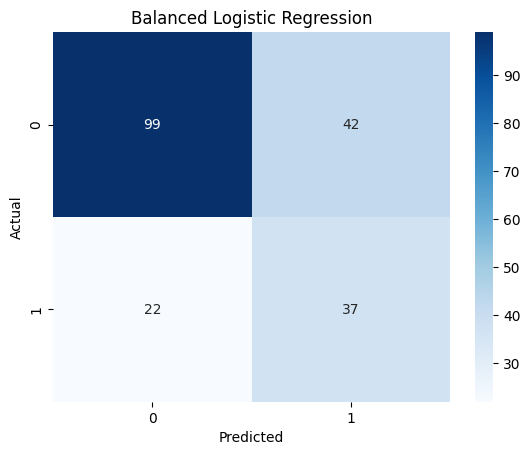

In [18]:
# --- 1. Create and Train the Model (with balanced classes) ---

# We add class_weight='balanced'
# This tells LogisticRegression to give a MUCH higher penalty
# to misclassifying the rare class (your '1's)
model_balanced = LogisticRegression(random_state=42, class_weight='balanced')

# We still use the same scaled training data
model_balanced.fit(X_train_scaled, y_train)

# --- 2. Make Predictions on the Test Set ---
y_pred_balanced = model_balanced.predict(X_test_scaled)

# --- 3. Evaluate the NEW Model's Performance ---
print("--- Classification Report (balanced model) ---")
print(classification_report(y_test, y_pred_balanced))

print("\n--- Confusion Matrix (balanced model) ---")
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Balanced Logistic Regression')
plt.show()

Result : we lost more TrueNegatives (predicted the no risk correctly ) but gained more TP while (predictied that there's risk correclty), in comparison to the first results, only 22 here are false negatives meaning the bank will lose less compared to the first model (35), but the price is that the bank will not gain from eventual credit allocations, that's the purpose of a weighted class, this second model is more suited for the bank, let's try to get better results with different models (randomForests).

In [19]:
from sklearn.ensemble import RandomForestClassifier

--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       141
           1       0.66      0.36      0.46        59

    accuracy                           0.76       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.74      0.76      0.73       200


--- Confusion Matrix (Random Forest) ---
[[130  11]
 [ 38  21]]


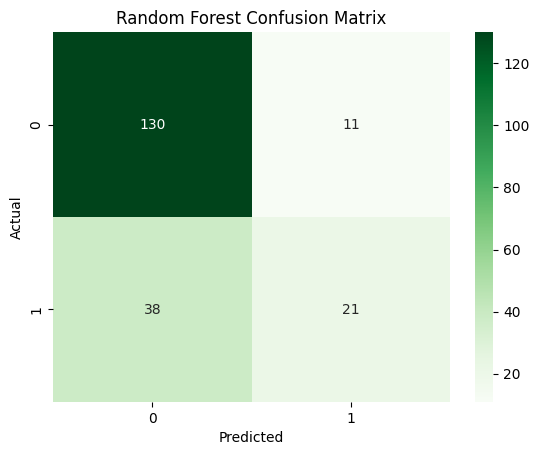

In [20]:
# --- 1. Create and Train the Model ---
# n_estimators=100 is the default (100 trees)
# random_state=42 ensures we get the same result every time
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# We use the SAME scaled training data
rf_model.fit(X_train_scaled, y_train)

# --- 2. Make Predictions on the Test Set ---
y_pred_rf = rf_model.predict(X_test_scaled)

# --- 3. Evaluate the Random Forest Model ---
print("--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Confusion Matrix (Random Forest) ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Visualize the new matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.show()

--- Classification Report (Random Forest Équilibré) ---
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       141
           1       0.71      0.34      0.46        59

    accuracy                           0.77       200
   macro avg       0.74      0.64      0.65       200
weighted avg       0.76      0.77      0.73       200


--- Confusion Matrix (Random Forest Équilibré) ---


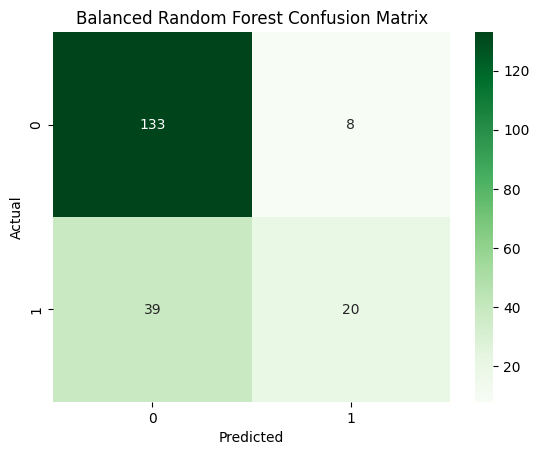

In [96]:
# --- 1. Create and Train the BALANCED Model ---
# We add class_weight='balanced'
# This tells each "tree" in the forest to treat
# misclassifying a '1' as a much more severe error.
rf_model_balanced = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    class_weight='balanced' # <-- The solution
)

# We use the SAME scaled training data
rf_model_balanced.fit(X_train_scaled, y_train)

# --- 2. Make Predictions ---
y_pred_rf_balanced = rf_model_balanced.predict(X_test_scaled)

# --- 3. Evaluate the BALANCED RF Model ---
print("--- Classification Report (Balanced Random Forest) ---")
print(classification_report(y_test, y_pred_rf_balanced))

print("\n--- Confusion Matrix (Balanced Random Forest ) ---")
cm_rf_balanced = confusion_matrix(y_test, y_pred_rf_balanced)

sns.heatmap(cm_rf_balanced, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
# --- 1. Create the SMOTE Resampler ---
# 'smote' will resample ONLY the training data
smote = SMOTE(random_state=42)

# add more copies of 1's 
# --- 2. Resample the Training Data ---
# We fit and apply SMOTE to our training data
# It will create new '1's until y_train is 50/50
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [23]:
#  Checking the new balance
print(pd.Series(y_train_resampled).value_counts()) 
# This should now show 50/50 balance

Risk
1    559
0    559
Name: count, dtype: int64


--- Classification Report (SMOTE + Random Forest) ---
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       141
           1       0.53      0.42      0.47        59

    accuracy                           0.72       200
   macro avg       0.65      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200


--- Confusion Matrix (SMOTE + Random Forest) ---


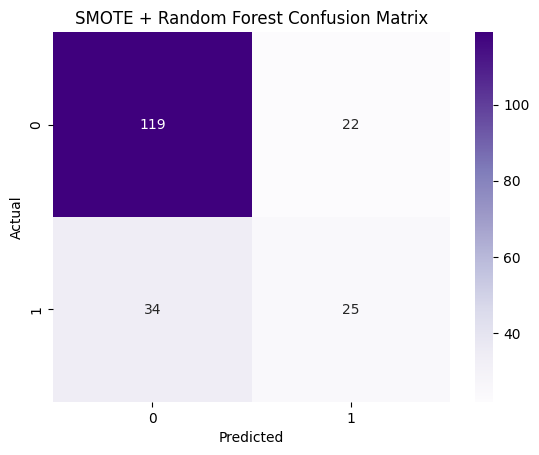

In [28]:
# --- 3. Train a NEW RF Model ---
# We use a simple, NON-BALANCED RF model
# because the data is NOW balanced.
rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)

# We fit on the NEW resampled data
rf_smote_model.fit(X_train_resampled, y_train_resampled)

# --- 4. Evaluate the SMOTE Model ---
# IMPORTANT: We still evaluate on the ORIGINAL, UNBALANCED test set
# because this represents the real world.
y_pred_smote = rf_smote_model.predict(X_test_scaled)

print("--- Classification Report (SMOTE + Random Forest) ---")
print(classification_report(y_test, y_pred_smote))

print("\n--- Confusion Matrix (SMOTE + Random Forest) ---")
cm_smote = confusion_matrix(y_test, y_pred_smote)

sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SMOTE + Random Forest Confusion Matrix')
plt.show()

### Final Project Conclusion & Model Selection
This project was a complete end-to-end exploration of the machine learning pipeline, from data cleaning and EDA to model selection and evaluation.

The primary challenge was identified during the EDA: the imbalanced nature of the data. Our target variable, Risk (1), was a rare class (the minority), while "Good" (0) was the majority.

This imbalance made Accuracy a misleading metric. Our business goal was to minimize False Negatives (FN)—the high-risk clients we incorrectly labeled as "Good"—as this is the most costly error for a bank.

We tested five different modeling approaches and found the following:

Baseline (Logistic Regression & Random Forest, Unbalanced): Both models (Model 1 & 3) failed. They achieved high accuracy by simply (and lazily) predicting the majority class ("Good"). This resulted in a dangerously high number of False Negatives (FN = 35 and 37, respectively).

Algorithm-Level Solution (class_weight='balanced'):

Logistic Regression (Model 2): This was our champion model. It achieved the best balance. By applying the balanced weight, it successfully reduced our critical FN error from 35 down to 22. The "price" was an increase in False Positives (FP) to 42, but this is a far better business trade-off.

Random Forest (Model 4): This approach failed. The class_weight parameter was ineffective, and the model performed almost identically to its unbalanced version, failing to identify the risk.

Data-Level Solution (SMOTE + Random Forest):

Model 5: This approach also failed and produced a high FN count of 34. This suggests the model overfitted to the "synthetic" data created by SMOTE and was unable to generalize to the real, unseen test set.

### Final Decision:

The best-performing model for this specific business problem is Model 2: Logistic Regression with StandardScaler and class_weight='balanced'.

This project demonstrates a critical lesson in data science: a more complex model (RandomForest) or a more complex data technique (SMOTE) is not always better. A simple, well-tuned, and interpretable model (LogisticRegression) that directly addresses the core problem (data imbalance) provided the most robust and reliable solution.